# Programming Assignment # 3 Clustering

## Student Details

## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is not required for this assignment. If you want to document a function or a process, just comment or use markup cell.
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster adults using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is part of "Adult". You can find more information here: https://archive.ics.uci.edu/ml/datasets/adult.
The classification problem is whether they earn more than 50,000$ or not.



You need to submit this ipython file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [2]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import cluster
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

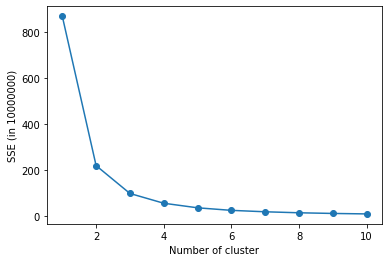

Since the elbow bends at 2, it is the best value of k.


In [3]:
#########################begin code for Task 1-a

data = pd.read_csv("clusteringdata.csv")

# Mapping target variable to 1 and 0
salary_map={' <=50K':1,' >50K':0}
data['Class']=data['Class'].map(salary_map).astype(int)

Y = data['Class']

# LabelEncoder is used on all columns to convert text or string into type suitable for model
data = data.apply(LabelEncoder().fit_transform)

# Calculating SSE for each value of k and storing in list. SSE is divided by 10000000 for ease of plotting graph
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k).fit(data)
    data["clusters"] = kmeans.labels_
    sse[k] = (kmeans.inertia_)/10000000

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), '-o')
plt.xlabel("Number of cluster")
plt.ylabel("SSE (in 10000000)")
plt.show()


print("Since the elbow bends at 2, it is the best value of k.")

#########################begin code for Task 1-a


### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [4]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing

X = data.drop(['Class'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.3,random_state = 0)

###################end code for Task 1-b-1

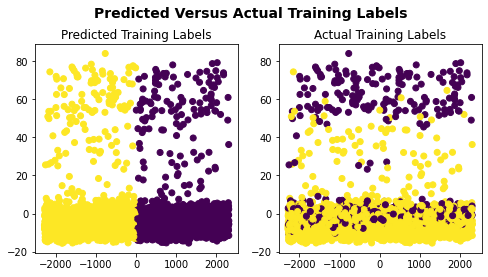

In [5]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA


# Create the KMeans model
clf = cluster.KMeans(init='k-means++', n_clusters=2, random_state=0).fit(X_train)
y_pred=clf.predict(X_test)

# Model and fit the training data to the PCA model
X_train_pca = PCA(n_components=2).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample 
cluster_center = clf.cluster_centers_
training_cluster = clf.fit_predict(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

# Create a plot with subplots
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjusting layout
fig.suptitle('Predicted Versus Actual Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Adding scatterplots to the subplots 
ax[0].scatter(x, y, c=training_cluster)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(x, y, c=y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()

###################end code for Task 1-b-2


Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

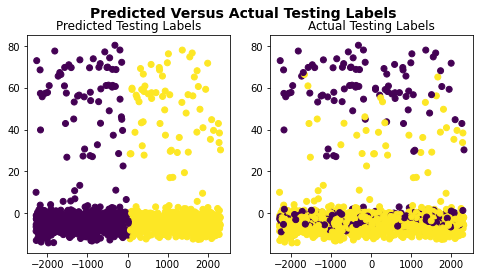

In [6]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels


# predict cluster index for each sample 
test_cluster = clf.fit_predict(X_test)

# Model and fit the data to the PCA model
X_test_pca = PCA(n_components=2).fit_transform(X_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Actual Testing Labels', fontsize=14, fontweight='bold')

# Add scatterplots to the subplots 
ax[0].scatter(x, y, c=test_cluster)
ax[0].set_title('Predicted Testing Labels')
ax[1].scatter(x, y, c=y_test)
ax[1].set_title('Actual Testing Labels')

# Show the plots
plt.show()
###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [7]:
###################begin code for Task 1-b-4: Print out a confusion matrix

print(metrics.confusion_matrix(y_test, y_pred))

###################end code for Task 1-b-4

[[166 201]
 [572 561]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [8]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
pdm_train = pairwise_distances(X_train)
# print(pdm_train)

## Model and fit the training data to the AgglomerativeClustering model
clusters = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')
cosine_cluster = clusters.fit_predict(X_train)
cosine_f1 = metrics.f1_score(y_train, cosine_cluster)
## complete linkage + cosine

## Model and fit the training data to the AgglomerativeClustering model
clusters = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
euclidean_cluster = clusters.fit_predict(X_train)
euclidean_f1 = metrics.f1_score(y_train, euclidean_cluster)
## complete linkage + euclidean


## Model and fit the training data to the AgglomerativeClustering model
clusters = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete')  
manhattan_cluster = clusters.fit_predict(X_train)
manhattan_f1 = metrics.f1_score(y_train, manhattan_cluster)
## complete linkage + manhattan


## Model and fit the training data to the AgglomerativeClustering model
clusters = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')  
average_cosine_cluster = clusters.fit_predict(X_train)
average_cosine_f1 = metrics.f1_score(y_train, average_cosine_cluster)
## average linkage + cosine


## Model and fit the training data to the AgglomerativeClustering model
clusters = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
average_euclidean_cluster = clusters.fit_predict(X_train)
average_euclidean_f1 = metrics.f1_score(y_train, average_euclidean_cluster)
## average linkage + euclidean


## Model and fit the training data to the AgglomerativeClustering model
clusters = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')  
eaverage_manhattan_cluster = clusters.fit_predict(X_train)
average_manhattan_f1 = metrics.f1_score(y_train, eaverage_manhattan_cluster)
## average linkage + manhattan

print("F1-score for complete linkage + cosine", cosine_f1)
print("F1-score for complete linkage + euclidean", euclidean_f1)
print("F1-score for complete linkage + manhattan", manhattan_f1)
print("F1-score for average linkage + cosine", average_cosine_f1)
print("F1-score for average linkage + euclidean", average_euclidean_f1)
print("F1-score for average linkage + manhattan", average_manhattan_f1)

###################end code for Task 2-a

F1-score for complete linkage + cosine 0.02603198214949795
F1-score for complete linkage + euclidean 0.4830595482546201
F1-score for complete linkage + manhattan 0.5606239659654928
F1-score for average linkage + cosine 0.8512532981530343
F1-score for average linkage + euclidean 0.4604883171436073
F1-score for average linkage + manhattan 0.5373208106772122


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

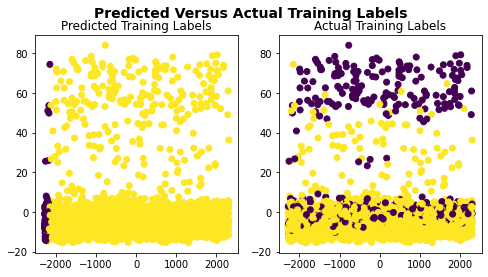

In [9]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels


# Visualize the predicted training labels versus actual training labels. 

# Create a plot with subplots
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjusting layout
fig.suptitle('Predicted Versus Actual Training Labels', fontsize=14, fontweight='bold')

# Adding scatterplots to the subplots 
ax[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=average_cosine_cluster)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()

###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

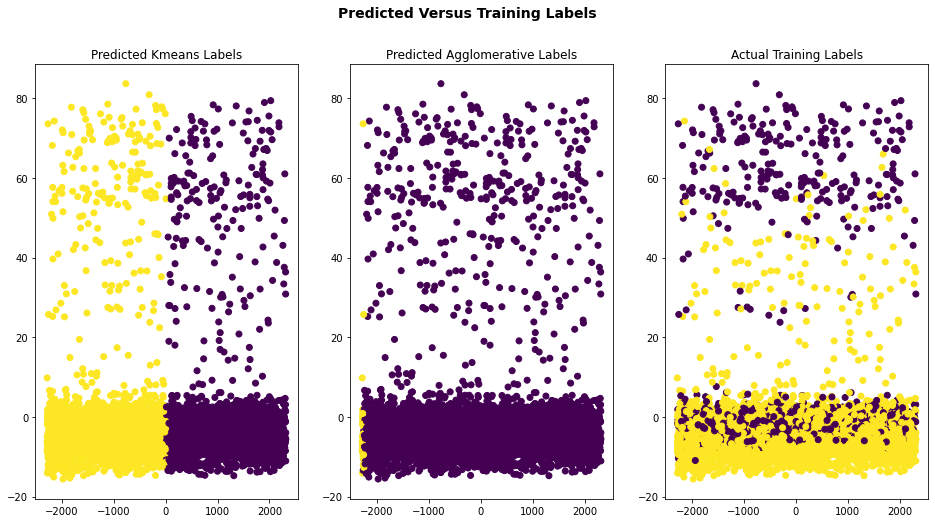

In [10]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)

# Create the KMeans model
clf = cluster.KMeans(init='k-means++', n_clusters=2, random_state=0).fit(X)
# y_pred=clf.predict(X)

# Compute cluster centers and predict cluster index for each sample 
kmeans_cluster = clf.fit_predict(X)

### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pdm_train = pairwise_distances(X)

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
agglo_cluster = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')  
agglo_cluster = agglo_cluster.fit_predict(X)
# average_cosine_f1 = metrics.f1_score(y_train, average_cosine_cluster)

### Visualize Clusters
# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 

#  Model and fit the data to the PCA model
X_pca = PCA(n_components=2).fit_transform(X)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_pca[:, 0]
y = X_pca[:, 1]

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 3, figsize=(16, 8))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')

# Add scatterplots to the subplots 
ax[0].scatter(x, y, c=kmeans_cluster)
ax[0].set_title('Predicted Kmeans Labels')
ax[1].scatter(x, y, c=agglo_cluster)
ax[1].set_title('Predicted Agglomerative Labels')
ax[2].scatter(x, y, c=Y)
ax[2].set_title('Actual Training Labels')

# Show the plots
plt.show()

###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [11]:
###################begin code for Task 3-b
print("--------------------- KMeans Clustering ------------------------")
print(metrics.confusion_matrix(Y, kmeans_cluster))
print(classification_report(Y, kmeans_cluster))

print("--------------------- Agglomerative Clustering ------------------------")
print(metrics.confusion_matrix(Y, agglo_cluster))
print(classification_report(Y, agglo_cluster))

print("Accuracy of Agglomerative Clustering is more than KMeans Clustering")
###################end code for Task 3-b

--------------------- KMeans Clustering ------------------------
[[ 571  650]
 [1912 1867]]
              precision    recall  f1-score   support

           0       0.23      0.47      0.31      1221
           1       0.74      0.49      0.59      3779

    accuracy                           0.49      5000
   macro avg       0.49      0.48      0.45      5000
weighted avg       0.62      0.49      0.52      5000

--------------------- Agglomerative Clustering ------------------------
[[1209   12]
 [3750   29]]
              precision    recall  f1-score   support

           0       0.24      0.99      0.39      1221
           1       0.71      0.01      0.02      3779

    accuracy                           0.25      5000
   macro avg       0.48      0.50      0.20      5000
weighted avg       0.59      0.25      0.11      5000

Accuracy of Agglomerative Clustering is more than KMeans Clustering
